# Data

PyTorch/Tensorflow _Tensor_ resemble _ndarray_ class in numpy, but they also support **automatic differentiation** and support **GPU** computations.

In [1]:
import torch

## Data manipulation

In [6]:
x = torch.arange(12, dtype=torch.float32)  # pytorch by default allocates on cpu.
x.numel()
X = x.reshape((3, 4))  # or implicitely x.reshape((3, -1))
X.shape

torch.Size([3, 4])

In [12]:
X_zeros = torch.zeros((3, 4))
X_ones = torch.ones((3, 4))
X_randn = torch.randn((3, 4))
X_manual = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X_ones)
display(X_randn)
X_manual.shape

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


tensor([[-1.1544,  1.1118, -0.9316, -0.6459],
        [ 2.2682,  0.9379,  0.6351, -0.1691],
        [-2.2795,  1.4738,  1.1451, -0.3036]])

torch.Size([2, 3])

In [13]:
# slicing and indexing
X, X[-1], X[1:3]

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [14]:
X[1, 2] = 12
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 12.,  7.],
        [ 8.,  9., 10., 11.]])

In [15]:
# unary function
torch.exp(x)

tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        1.6275e+05, 1.0966e+03, 2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04])

In [17]:
# binary scalar operators
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [18]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2.0, 1, 4, 3], [1 ,2, 3, 4], [4, 3, 2, 1]])
torch.cat([X, Y], dim=0), torch.cat([X, Y], dim=1)  # concatenation along axis=0(rows) and axis=1(cols)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [19]:
# element-wise logical operator
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [20]:
X.sum()

tensor(66.)

### Broadcasting
We saw how to do elementwise operations on two tensors. If the shapes don't match, we can still do broadcasting. Concatenate the same tensors along one of the dimensions for both, so we get a matching shape, and then do the elementwise operation.

In [21]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [22]:
a + b, b + a

(tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

### Saving memory
in the expression Y = Y + X, here the rhs Y memory is allocated and used to evaluate rhs, then Y is dereferenced, a new memory is allocated for lhs Y.

In [25]:
print(id(Y))
before = id(Y)
Y = Y + X
print(id(Y))
id(Y) == before

140536925117376
140536926214384


False

In ML, this is not desirable and has memory executation overhead. Instead we can do assignment **in-place** using the notation ```[:] = rhs``` or ```+=```.

In [26]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140536776162368
id(X) 140536776162368


In [27]:
before = id(X)
X += Y
id(X) == before

True

### Converting tensors to other python objects
They share the underlying memory. when one is changed in-place (otherwise memory is derefered and we might even get memory leak), the other changes too.

In [29]:
A = X.numpy()
B = torch.from_numpy(A)
print(id(A) == id(B))  # ??? memory is not the same
print(id(A) == id(X))  # ??? here also not the same
(type(A), type(B))

False
False


(numpy.ndarray, torch.Tensor)

In [30]:
# We can convert a single tensor in many ways to a python primitive type
a = torch.tensor(3.5)
(a, a.item(), float(a), int(a))

(tensor(3.5000), 3.5, 3.5, 3)

In [49]:
import numpy as np
x = torch.tensor(2)
y = 3
before = id(x)
x += y
(id(x) == before, type(x))

(True, torch.Tensor)

## Data Preprocessing

CSV = comma seperated value

and pandas good in working with them.

iloc : integer-location based indexing

pandas replaces missing values, e.g. `NA` or `1,2,,,4` with `NaN` 

In [52]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [54]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


### Data Cleaning
Missing values are a problem. Two workarounds:
- deletion: which is just deleting either entry or the attribute
- imputation: for categorical attributes, NaN could itself be considered as a category. For numerical, we can replace by mean for that attribute.

In [59]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


In [60]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


In [62]:
# transforming to tensors from pandas
X, y = torch.tensor(inputs.values), torch.tensor(targets.values)  # Don't forget the .values
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# Exercise
Trying Abalone data from here: https://archive.ics.uci.edu/ml/datasets.php

In [71]:
import urllib.request

DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
DATASET_NAMES_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names"
abalone_dataset = os.path.join('.', 'data', 'abalone.data')
abalone_names = os.path.join('.', 'data', 'abalone.names')

urllib.request.urlretrieve(DATASET_URL, abalone_dataset)
urllib.request.urlretrieve(DATASET_NAMES_URL, abalone_names)

('./data/abalone.names', <http.client.HTTPMessage at 0x7fd144829cc0>)

In [72]:
abalone_column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                        'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv(abalone_dataset, names=abalone_column_names)
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [74]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [75]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>],
       [<Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>, <Axes: >]], dtype=object)

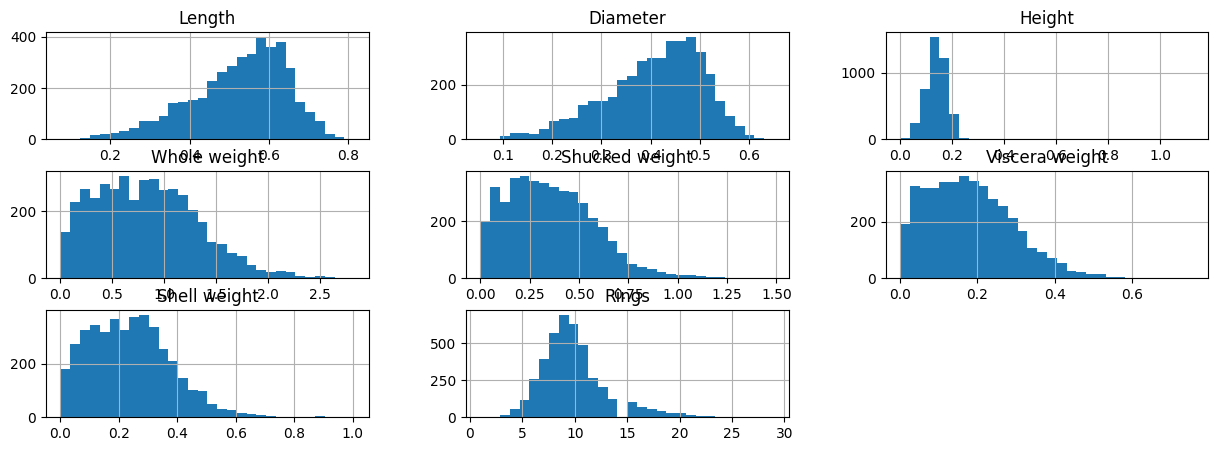

In [79]:
data.hist(bins=30, figsize=(15, 5))